Homework 5

Copy this notebook. Rename it as: YOURNAME-HW5-streams 

with your name replacing YOURNAME.

Upload your completed jupyter notebook to elearning site as your homework submission. You can put this notebook on your github.

5.1  Register for a stream of Twitter data

5.2  Create a bloom filter classifying two days worth of twitters  ( after removing stop words and urls )

5.3  For another days worth of twitter data find the previous twitters that match in the bloom filter
(This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

5.4 Plot a historgram of matches for each twitter in 5.3

For the 4-5 grade.- Submit in a separate notebook - YourNAME-Homework5-Supplement

1. Use a different machine learning training algorithm
2. Make a continous feed where you take two days of data and match the incoming stream ( do this for 5 days windowing the filter data)
3. Find new trends in the twitter feed (daily or hourly)
4. Or some other streaming exploration of your choosing+

###  ********  I have taken the data stream which contains the tweets related to the three different headaches i.e Migraine, Sinus, Tension

### 1. Data stream of first 2 days

In [1]:
%%writefile code/new_twython_streaming-Copy1.py
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

OAUTH_TOKEN = "580001976-WjIWX5gg3mDDfvgT2PVKa5LKwKGUqgXwL3UnThG4"
OAUTH_TOKEN_SECRET = "U8hhfYJXCn1wZ2HuKJNxME50cz6NSbvZerxiJccukdMW7"
APP_KEY = "fr9yhl6JYH1WOmHDUQbQ350LZ"
APP_SECRET = "PjpiGkip6HewmTGodMLXqT0fKEi986L2pprjrigaeYPL7kttdL"

class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(APP_KEY, APP_SECRET)
    auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    stream = Stream(auth, l)

    stream.filter(track=['Migraine', 'Sinus', 'Tension'])

Overwriting code/new_twython_streaming-Copy1.py


In [ ]:
%%cmd
python code/new_twython_streaming-Copy1.py > tweepy_test.txt

### 2. Data Stream of next 2 days

In [ ]:
%%writefile code/new_twython_streaming-Copy1.py
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

OAUTH_TOKEN = "580001976-WjIWX5gg3mDDfvgT2PVKa5LKwKGUqgXwL3UnThG4"
OAUTH_TOKEN_SECRET = "U8hhfYJXCn1wZ2HuKJNxME50cz6NSbvZerxiJccukdMW7"
APP_KEY = "fr9yhl6JYH1WOmHDUQbQ350LZ"
APP_SECRET = "PjpiGkip6HewmTGodMLXqT0fKEi986L2pprjrigaeYPL7kttdL"

class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(APP_KEY, APP_SECRET)
    auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    stream = Stream(auth, l)

    stream.filter(track=['Migraine', 'Sinus', 'Tension'])

In [ ]:
%%cmd
python code/new_twython_streaming-Copy1.py > twpytwo.txt

### I am changing to this directory as my text files are residing here each of  120 MB

In [1]:
import os
os.chdir("C:\Users\Nikitha\Downloads")


### Since the data we retrieve from twitter is in JSON format, I parsed the text file  using pandas and created a data frame with  the columns text and language.

### The code below displays the first 10 tweets from the first text file(tweets of first 2 days) in the data frame 

In [16]:
import json
import pandas as pd
tweets_data_path = 'tweepy_test.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets = pd.DataFrame()
tweets['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets_by_lang = tweets['lang'].value_counts()
tweets.head(10)

23263


,text,lang
0,https://t.co/suXl7nqNTW,und
1,RT @AltKebab: @JesseLehrich @beatabiel @dorsey...,en
2,RT @BernieSanders: I hope and expect that the ...,en
3,RT @faithpriester: You might be onto something...,en
4,RT @CrankThaObsesin: I-I-I got a migraine now ...,en
5,Woke up with a huge migraine and now my eyebal...,en
6,RT @carinahsieh: imagine a rom com so perfect ...,en
7,RT @brgsjks: Aku paling fuck orang jenis kejar...,in
8,RT @jamesgirardier: Don’t know about streaming...,en
9,RT @BernieSanders: I hope and expect that the ...,en


### The code below filters the tweets that are in english

### Data_frame.loc[row_indexer, column_index] can select rows and columns depending on the type of values  of rows and columns. 

### *************** In my case I am filtering the rows that are in english and text

In [55]:
tweet_text=tweets.loc[tweets['lang'] == 'en', 'text']

print tweet_text.head(10) ## Prints the first 10 rows in the data frame

1     RT @AltKebab: @JesseLehrich @beatabiel @dorsey...
2     RT @BernieSanders: I hope and expect that the ...
3     RT @faithpriester: You might be onto something...
4     RT @CrankThaObsesin: I-I-I got a migraine now ...
5     Woke up with a huge migraine and now my eyebal...
6     RT @carinahsieh: imagine a rom com so perfect ...
8     RT @jamesgirardier: Don’t know about streaming...
9     RT @BernieSanders: I hope and expect that the ...
10    RT @Guccistavo_: Ok but this picture just some...
11    I reported a broken power line insulator on a ...
Name: text, dtype: object


### The code below displays the first 10 tweets from the second text file(tweets of next 2 days) in the data frame and filter the tweets that are in english

In [54]:
import json
import pandas as pd
tweets_data_path = 'twpytwo.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets2 = pd.DataFrame()
tweets2['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets2['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets_by_lang = tweets2['lang'].value_counts()
tweets2.head(10)

23220


,text,lang
0,Disney Ban Elevated Tension at Los Angeles Tim...,en
1,RT @brgsjks: Aku paling fuck orang jenis kejar...,in
2,RT @brgsjks: Aku paling fuck orang jenis kejar...,in
3,Emphasizing product over process leads to tens...,en
4,RT @BernieSanders: I hope and expect that the ...,en
5,RT @loripope6464: Check out Russ Berrie &amp; ...,en
6,Father God take these sinus troubles AWAY. i h...,en
7,RT @brgsjks: Aku paling fuck orang jenis kejar...,in
8,RT @brgsjks: Aku paling fuck orang jenis kejar...,in
9,RT @carinahsieh: imagine a rom com so perfect ...,en


In [19]:
tweet_text=tweets2.loc[tweets2['lang'] == 'en', 'text']

print tweet_text.head(10)

0     Disney Ban Elevated Tension at Los Angeles Tim...
3     Emphasizing product over process leads to tens...
4     RT @BernieSanders: I hope and expect that the ...
5     RT @loripope6464: Check out Russ Berrie &amp; ...
6     Father God take these sinus troubles AWAY. i h...
9     RT @carinahsieh: imagine a rom com so perfect ...
10    RT @micahncarter: Refuse to let your place of ...
11    RT @carinahsieh: imagine a rom com so perfect ...
12    A fantastic, portable chair back massager with...
14    RT @lice_59: #YehUnDinonKiBaatHai Finally the ...
Name: text, dtype: object


### For cleaning the data stream (eliminating stop words, URLs, special characters and retweets) I made use of regular expressions and stored the cleaned data in a list

In [56]:
import json, nltk, re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_data(tweets_data_path):
    tweets_data = []
    stop_words = set(stopwords.words('english'))
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            if tweet["lang"]=='en':
                tweet_text = tweet["text"]
                #print tweet_text
                filter_url = re.sub(r"http\S+", "", tweet_text)
                #print filter_url
                filter_names = re.sub(r"RT+.*\:", "", filter_url)
                #print filter_names
                filter_splchar = re.sub("[^A-Z a-z]+", "", filter_names)
                filter_stop = [word for word in (filter_splchar.lower()).split() if word not in stop_words]
                result = ' '.join(filter_stop)
                tweets_data.extend(result.split())       
        except:
            continue
            
    return tweets_data

### I stored all the cleaned data of first 2 days data in a new  text file

In [59]:
tweepy_text1_path = 'tweepy_test.txt'
tweepy_text1 = clean_data(tweepy_text1_path)
print tweepy_text1[:80]
tweepy_text1_words = set(tweepy_text1)
text1_words_file = open('tweepy_text1_words.txt', 'w')
for item in list(tweepy_text1_words):
    text1_words_file.write("%s\n" % item)

[u'jesselehrich', u'beatabiel', u'dorseyshaw', u'poland', u'jews', u'historically', u'tax', u'collectors', u'usury', u'lenders', u'later', u'b', u'hope', u'expect', u'united', u'states', u'assist', u'disaster', u'relief', u'efforts', u'iran', u'might', u'onto', u'something', u'dude', u'iii', u'got', u'migraine', u'woke', u'huge', u'migraine', u'eyeball', u'hurts', u'gone', u'funny', u'like', u'ive', u'stared', u'sun', u'long', u'imagine', u'rom', u'com', u'perfect', u'never', u'end', u'together', u'stay', u'enemies', u'sexual', u'tension', u'die', u'dont', u'know', u'streaming', u'tonight', u'todays', u'show', u'drained', u'ive', u'got', u'migraine', u'im', u'trying', u'get', u'rid', u'well', u'hope', u'expect', u'united', u'states', u'assist', u'disaster', u'relief', u'efforts', u'iran', u'ok', u'picture', u'somehow', u'screamed']


### Stored all the cleaned data of  second text file(next 2 days data) in a new text file. These 2 new files of cleaned data is stored in new directory named "cleaned_words"

In [60]:
tweepy_text2_path = 'twpytwo.txt'
tweepy_text2 = clean_data(tweepy_text2_path)
print tweepy_text2[:80]
tweepy_text2_words = set(tweepy_text2)
tweepy_text2_file = open('tweepy_text2_words.txt', 'w')
for item in list(tweepy_text2_words):
    tweepy_text2_file.write("%s\n" % item)

[u'disney', u'ban', u'elevated', u'tension', u'los', u'angeles', u'times', u'newsroom', u'emphasizing', u'product', u'process', u'leads', u'tension', u'stress', u'anxiety', u'unfortunately', u'become', u'e', u'hope', u'expect', u'united', u'states', u'assist', u'disaster', u'relief', u'efforts', u'iran', u'check', u'russ', u'berrie', u'amp', u'co', u'inc', u'wanna', u'play', u'happy', u'birthday', u'sex', u'relieves', u'tension', u'figurines', u'via', u'e', u'father', u'god', u'take', u'sinus', u'troubles', u'away', u'much', u'like', u'til', u'much', u'imagine', u'rom', u'com', u'perfect', u'never', u'end', u'together', u'stay', u'enemies', u'sexual', u'tension', u'die', u'refuse', u'let', u'place', u'blessing', u'become', u'place', u'frustration', u'enemy', u'wants', u'nothing', u'li', u'imagine', u'rom', u'com', u'perfect']


### I used bloom filter to split the posts of two days and stored it in a dictionary with name as key and list of words as values.

In [71]:
from pybloom import BloomFilter
import os
import re

filters = {}
for name, words in classify_posts.items():
    print name, words
    filters[name] = BloomFilter(capacity=len(words), error_rate=0.1)
    for word in words:
        filters[name].add(word)
def search(search_string):
    search_terms = re.split("\W+", search_string)
    return [name for name, filter in filters.items() if all(term in filter for term in search_terms)]

tweepy_text1_words.txt set(['hussainisaadatu', 'raining', 'leejasper', 'chesey', 'hitrecordjoe', 'itweetyouread', 'four', 'nigeltheram', 'woods', 'etinoco', 'spiders', 'hanging', 'localized', 'marching', 'increase', 'banconeri', 'electricity', 'scold', 'uhbadly', 'quadruple', 'adamandeve', 'fingernails', 'videostringinght', 'tingle', 'funk', 'lord', 'immature', 'swivel', 'hormone', 'squeekzoid', 'basementgetting', 'regional', 'confusionall', 'figh', 'thelordjacobiii', 'screaming', 'sanayabreanna', 'crazyrock', 'disturb', 'gorkhaland', 'vveldandi', 'wednesday', 'piling', 'oooh', 'reframe', 'straight', 'bloglovin', 'drogothefighter', 'ahead', 'specially', 'tired', 'tolerate', 'snuggles', 'bacon', 'tensioncomerelaxwithus', 'jasonmomoa', 'elegant', 'second', 'forchildren', 'probirth', 'snuggled', 'alukumi', 'blouse', 'brexit', 'noisethe', 'relieving', 'faizamukhtar', 'noirvember', 'itsdaqane', 'contributed', 'fingers', 'victims', 'gujarati', 'sudhirchaudhary', 'yayanother', 'fasciitistry',

### Created a new directory which holds the files that contains classified tweets according to the days. I then searched for the next two days words that match with the bloom filter data(different days data)

In [76]:
matched_words = []
POST_DIR = 'cleaned_words/'
# Read all my posts.
posts = {post_name: open(POST_DIR + post_name).read() for post_name in os.listdir(POST_DIR)}
# Create a dictionary of {"post name": "lowercase word set"}.
classify_posts = {name: set(re.split("\W+", contents.lower())) for name, contents in posts.items()}

for name, words in classify_posts.items():
       for word in words:
        if search(word) == ['tweepy_text2_words.txt']:
            matched_words.append(word)

In [77]:
print matched_words


['places', 'carried', 'perks', 'kaileyblunk', 'urg', 'realise', 'getting', 'carrier', 'bosses', 'leader', 'trout', 'segalink', 'bonnegreer', 'ripped', 'oktoberfestbeerhoparmored', 'devin', 'ofseasandsand', 'mito', 'murdered', 'pasta', 'weaving', 'insults', 'throne', 'threats', 'rare', 'universe', 'spilled', 'knifedrama', 'shipping', 'sidekick', 'mfas', 'ranveersfan']


In [78]:

match_words = [x for x in tweepy_text2 if x in matched_words]
sort_match = sorted(match_words)
print sort_match

[u'bonnegreer', u'bonnegreer', u'bosses', u'carried', u'carrier', u'carrier', u'carrier', u'carrier', u'carrier', u'carrier', u'devin', u'devin', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'getting', u'

### The code below gives the 10 most frequent matched words

In [50]:
m = pd.DataFrame(sort_match)
match = m[0].value_counts().head(10)
match

spilled    626
year       111
getting     97
sick        71
emotive     59
create      56
made        49
book        40
pills       24
van         22
Name: 0, dtype: int64

### Histogram of matches for each twitter

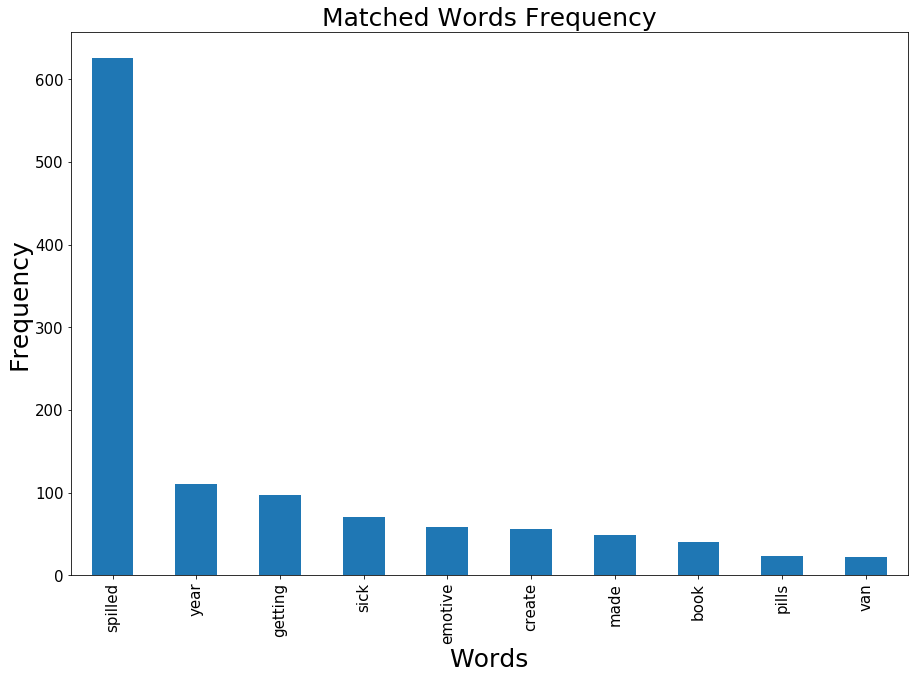

In [51]:
import matplotlib.pyplot as plt
ax = match.plot(x=0, y=1, kind="bar", figsize=(15, 10), fontsize=15)
ax.set_title('Matched Words Frequency', fontsize=25)
ax.set_ylabel("Frequency", fontsize=25)
ax.set_xlabel("Words", fontsize=25)
plt.show()

### From the above histogram it can be observed that spilled is the most frequently matched word

### Sources : 

https://stackoverflow.com/questions/45395676/remove-a-url-row-by-row-from-a-large-set-of-text-in-python-panda-dataframe

https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string

https://stackoverflow.com/questions/32425334/splitting-a-string-in-a-python-dataframe

http://localhost:8888/notebooks/Downloads/big-data-python-class-master/Lectures/Lecture6-Streams/Bloom%20Filter%20Example.ipynb

https://rodolfoferro.wordpress.com/2017/09/12/sentiment-analysis-on-trumps-tweets-using-python/

###### ****** For the bloom filter I have discussed with my friend sravani  and worked with her